In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("punkt")
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
import altair as alt
from vega_datasets import data
alt.renderers.enable('mimetype')

In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/ZoeLeBlanc/visualizing_humanities_data_workshop/master/web_scraped_humanist_listserv.csv")

In [3]:
data_df["year_start"] = data_df["dates"].str.split("-").str[0]
data_df["year_end"] = data_df["dates"].str.split("-").str[1]
data_df["volume_size"] = data_df["text"].str.count("\n")
data_df = data_df.iloc[:21]
data_df

,dates,text,year_start,year_end,volume_size
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987,1988,50794
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988,1989,36109
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989,1990,108695
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990,1991,118929
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1992,81193
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992,1993,59957
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993,1994,71763
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994,1995,46569
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995,1996,61076
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996,1997,52506


In [4]:
def stem_words(row):
    stemmed_words = ""
    for token in row.text.split(" "):
        stemmed_words += porter.stem(token) + " " 
    return stemmed_words

data_df["stemmed_text"] = data_df.apply(stem_words, axis=1)

In [ ]:
documents = data_df.text.tolist()
vectorizer = TfidfVectorizer(max_df=.5, min_df=1, stop_words=stop_words)
transformed_documents = vectorizer.fit_transform(documents)
transformed_documents_as_array = transformed_documents.toarray()
dates = data_df.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df["dates"] = dates[counter]
    tfidf_results.append(one_doc_as_df)

In [10]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by = ["score"], ascending = False)
tfidf_df.head(10)

,term,score,dates
0,ninch,0.841249,2002-2003
0,ninch,0.822897,2000-2001
0,ninch,0.790522,2001-2002
0,utorepas,0.766377,1987-1988
0,ninch,0.671890,1999-2000
0,ninch,0.648168,1998-1999
1,amico,0.444180,1999-2000
0,fqs,0.426306,2005-2006
0,ninch,0.412630,1997-1998
0,wmccarty,0.384587,2007-2008


In [13]:
terms = tfidf_df.term.unique()[:10]

In [14]:
print(terms)

['ninch' 'utorepas' 'amico' 'fqs' 'wmccarty' 'fludd' 'google' 'elra'
 'wikipedia' '7848']


In [16]:
top_ten = tfidf_df.drop_duplicates(subset = "term", keep = 'first').head(10)

In [17]:
top_ten

,term,score,dates
0,ninch,0.841249,2002-2003
0,utorepas,0.766377,1987-1988
1,amico,0.444180,1999-2000
0,fqs,0.426306,2005-2006
0,wmccarty,0.384587,2007-2008
1,fludd,0.337311,2007-2008
0,google,0.333120,2004-2005
1,elra,0.321378,1997-1998
1,wikipedia,0.316421,2005-2006
0,7848,0.301380,2003-2004


<AxesSubplot:>

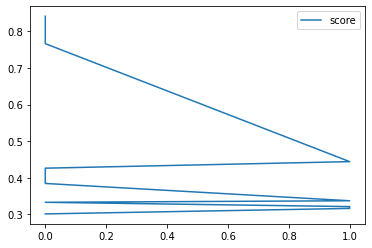

In [20]:
graph = top_ten[['term', 'score']]
graph.plot()

In [25]:
alt.Chart(top_ten).mark_bar().encode(
    x ="term",
    y="score",
    color=alt.Color("term", scale=alt.Scale(scheme = "accent"), sort = alt.Sort()),
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [26]:
alt.Chart(top_ten).mark_bar().encode(
    x = "dates",
    y = "score",
    color = alt.Color("term", scale=alt.Scale(scheme = "accent"), sort=alt.Sort()),
)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
